### Bayes Classifier

author: Jacob Schreiber <br>
contact: jmschreiber91@gmail.com

Although most of the models implemented in pomegranate are unsupervised, a simple way to construct a classifier using probabilistic models is to use Bayes' rule. Specifically, given a set of probabilistic models M, one can make classifications on some data D by calculating the posterior probability of the data under each of these models.

\begin{equation}
    P(M|D) = \frac{P(D|M)P(M)}{P(D)}
\end{equation}

Specifically, what this equation is saying is that one should calculate the likelihood of the data under each component, $P(D|M)$, multiply it by the prior probability of data coming from that component regardless of what the data actually is $P(M)$, and then divide by some factor. 

More concretely: if you have a set of probability distributions and want to classify points as having come from one of them, you just calculate the likelihood of the data given the distribution and then multiply through by the prior for each distribution, which can just be a uniform distribution.

In [1]:
%pylab inline
import seaborn; seaborn.set_style('whitegrid')

import torch

from pomegranate.bayes_classifier import BayesClassifier
from pomegranate.distributions import *


numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

%load_ext watermark
%watermark -m -n -p numpy,scipy,torch,pomegranate

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'pomegranate.bayes_classifier'

### Naive Bayes

The simplest form of a Bayes classifier is the naive Bayes classifier. The reason it is "naive" is that the classifier assumes that the features are all independent from each other. This assumption makes the classifier fast and interpretable.

#### Initialization and Fitting

Bayes classifiers can be initialized or fit in the same way that mixtures can. Specifically, you can either pass in learned distributions, or uninitialized distributions that are then fit.

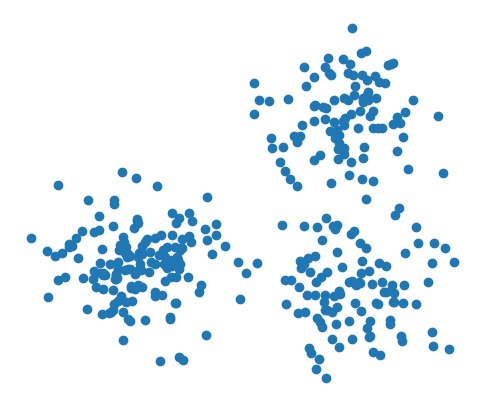

In [3]:
numpy.random.seed(0)

X = numpy.concatenate([numpy.random.normal((7, 2), 1, size=(100, 2)),
                       numpy.random.normal((2, 3), 1, size=(150, 2)),
                       numpy.random.normal((7, 7), 1, size=(100, 2))])

y = numpy.concatenate([numpy.zeros(100), numpy.zeros(150)+1, numpy.zeros(100)+2])

plt.figure(figsize=(6, 5))
plt.scatter(X[:,0], X[:,1])
plt.axis(False)
plt.show()

A Gaussian naive Bayes model can be initialized like the following:

In [4]:
d1 = Normal([1.1, 1.3], [0.3, 0.9], covariance_type='diag')
d2 = Normal([1.3, 1.8], [1.1, 1.5], covariance_type='diag')
d3 = Normal([2.1, 2.3], [0.5, 1.8], covariance_type='diag')

model = BayesClassifier([d1, d2, d3])

And we can make predictions for the above points just like other methods:

In [ ]:
y_hat = model.predict(X)

for i in range(3):
    plt.scatter(*X[y_hat == i].T)

plt.axis(False)    
plt.show()

Wow, looks pretty bad. Let's try fitting to the data.

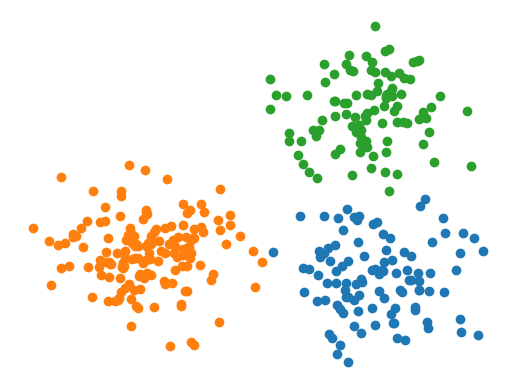

In [11]:
model = BayesClassifier([Normal(covariance_type='diag') for i in range(3)]).fit(X, y)

y_hat = model.predict(X)


for i in range(3):
    plt.scatter(*X[y_hat == i].T)

plt.axis(False)    
plt.show()